----------
**Credit Fraud**
=====================================

***Zoe Li***

----------

## Problem Description

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data

In [5]:
data = pd.read_csv("creditcard_train.csv")
data.head()
#data.describe()
#data.info()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
print(data.groupby(['Class']).size())

Fraud_transacation = data[data["Class"]==1]
Normal_transacation = data[data["Class"]==0]
print("percentage of fraud transacation is", len(Fraud_transacation) / len(data) * 100)
print("percentage of normal transacation is", len(Normal_transacation) / len(data) * 100)


# X = data.iloc[:,1:31]
# y = data['Class']
#Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.2, random_state=3)

Class
0    227394
1       395
dtype: int64
percentage of fraud transacation is 0.17340609072431065
percentage of normal transacation is 99.82659390927569


### Visualization

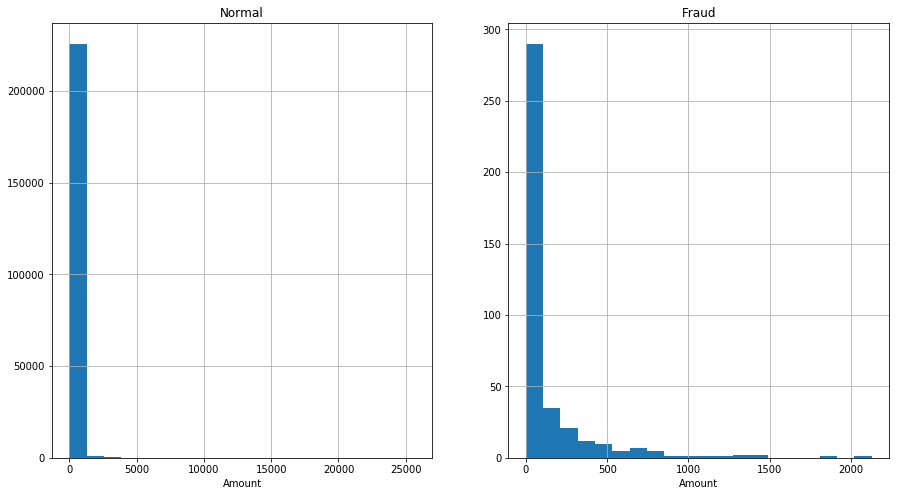

In [25]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
data[data['Class'] == 0]['Amount'].hist(bins = 20)
plt.title('Normal')
plt.xlabel('Amount');
plt.subplot(122)
data[data['Class'] == 1]['Amount'].hist(bins = 20);
plt.title('Fraud')
plt.xlabel('Amount');

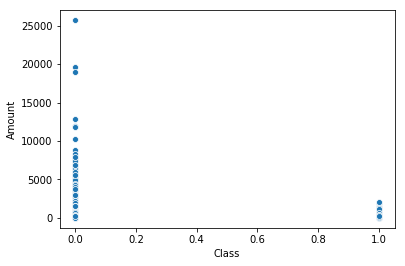

In [19]:
sns.scatterplot(x='Class', y='Amount', data=data);

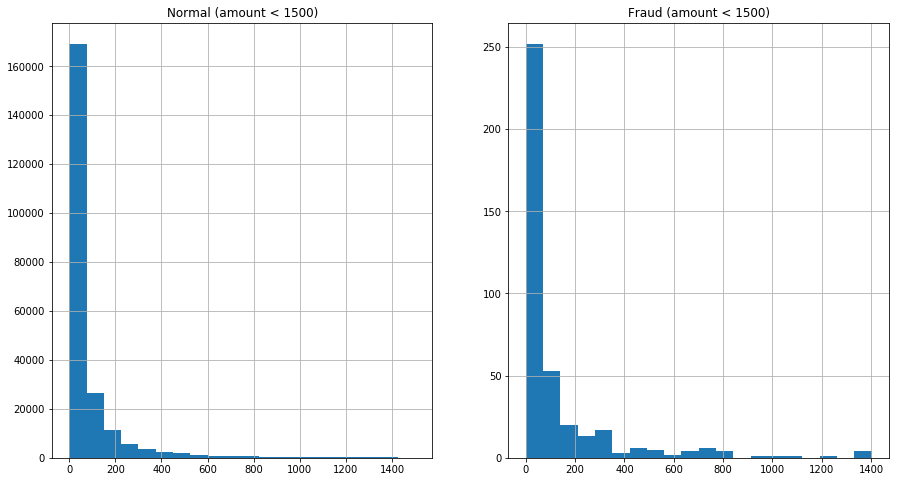

In [23]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
data[(data['Class'] == 0) & (data['Amount'] < 1500.0)]['Amount'].hist(bins = 20)
plt.title('Normal (amount < 1500)');
plt.subplot(122)
data[(data['Class'] == 1) & (data['Amount'] < 1500.0)]['Amount'].hist(bins = 20);
plt.title('Fraud (amount < 1500)');

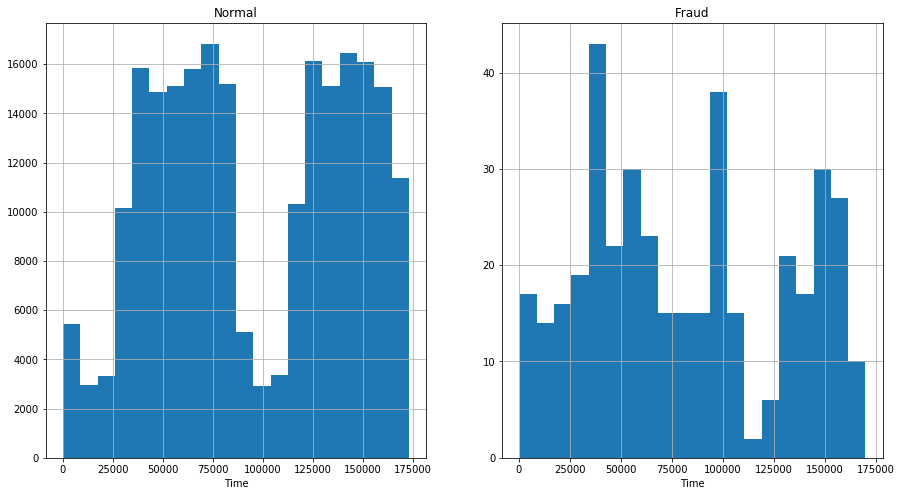

In [27]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
data[data['Class'] == 0]['Time'].hist(bins = 20)
plt.title('Normal')
plt.xlabel('Time');
plt.subplot(122)
data[data['Class'] == 1]['Time'].hist(bins = 20);
plt.title('Fraud')
plt.xlabel('Time');

### Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data.head()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.997363,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.245871,0
1,1,-1.997363,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.340093,0
2,2,-1.997342,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.159293,0
3,3,-1.997342,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.141703,0
4,4,-1.997321,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.071697,0


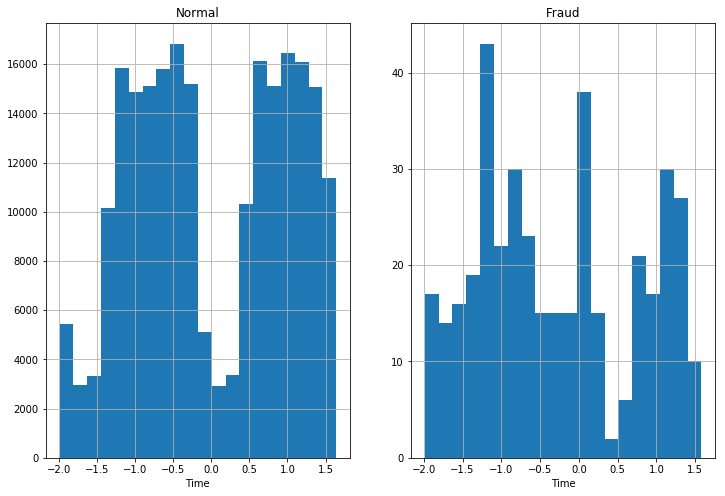

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
data[data['Class'] == 0]['Time'].hist(bins = 20)
plt.title('Normal')
plt.xlabel('Time');
plt.subplot(122)
data[data['Class'] == 1]['Time'].hist(bins = 20);
plt.title('Fraud')
plt.xlabel('Time');

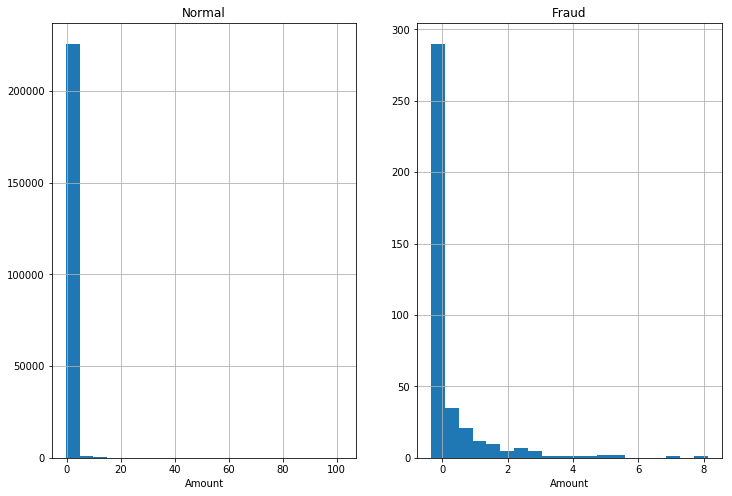

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
data[data['Class'] == 0]['Amount'].hist(bins = 20)
plt.title('Normal')
plt.xlabel('Amount');
plt.subplot(122)
data[data['Class'] == 1]['Amount'].hist(bins = 20);
plt.title('Fraud')
plt.xlabel('Amount');

## Classifications

### Normal

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

In [34]:
X = data.iloc[:,1:31]
y = data['Class']
y = np.ravel(y) 
#Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.2, random_state=3)

In [54]:
from sklearn import metrics 
from sklearn.model_selection import  KFold, train_test_split, cross_val_score 


def model_score(model, X,y):
    kf = KFold(n_splits=3, shuffle=True, random_state=0)
    m_score = cross_val_score(model, X, y, scoring="accuracy", cv=kf)
    f1_score = cross_val_score(model, X, y, scoring="f1", cv=kf)
    return (m_score.mean(), f1_score.mean())
    #return f1_score.mean()

In [77]:

from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC as SVC
# from sklearn.ensemble import GradientBoostingClassifier as GB
# from sklearn.neural_network import MLPClassifier as MLP

#model_list = [LR(),KN(),DT(),RF(),GB(),MLP()]
model_list = [LR(), DT()]


score_l = []
for model in model_list:
    score_l.append(model_score(model, X, y))
    
d={'Model':model_list,'Accuracy, F1 score':score_l}   
res_frame=pd.DataFrame(d)
res_frame



,Model,"Accuracy, F1 score"
0,"LogisticRegression(C=1.0, class_weight=None, d...","(0.999218575161897, 0.7386469772400592)"
1,"DecisionTreeClassifier(class_weight=None, crit...","(0.9990210236302054, 0.7124466795809425)"


In [ ]:
def generateReport(model_type, ground_truth, predict):
    scores.append((model_type, f1_score(ground_truth, predict), 
                 precision_score(ground_truth, predict),
                 recall_score(ground_truth, predict),
                 accuracy_score(ground_truth, predict)))
    
# for key, classifier in classifiers.items():
#     print(key)
#     classifier.fit(X_train, y_train.values.ravel())
#     classifier_pred = classifier.predict(X_test)
#     print(classification_report(y_test, classifier_pred))

# model = RandomForestClassifier(n_estimators = 200, 
#                                  max_features = 3, 
#                                  min_samples_leaf = 1, 
#                                  min_samples_split = 2, 
#                                  n_jobs = -1,
#                                 random_state = 42)


xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
log_cfl = LogisticRegression()
rf_cfl = RandomForestClassifier(n_jobs = -1,
                                random_state = 42)
model = VotingClassifier (estimators = [('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)],
                     voting='soft', weights = [1, 1, 1.33])
                    
                    
                    
model.fit(X, y)
ypred = model.predict(Xtest)


### Undersampling the Majority Class

In [52]:
data = data.sample(frac=1) # shuffle the data
fraud_df = data.loc[data['Class'] == 1]
normal_df = data.loc[data['Class'] == 0][:395]

normal_dis_df = pd.concat([fraud_df, normal_df])

# shuffle the rows
new_df = normal_dis_df.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()

(790, 32)


,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123893,155057,0.198733,-0.541021,-1.406677,0.975383,-1.504580,-1.042517,-0.498811,-0.494168,-1.034032,...,1.191179,0.199235,-1.009762,-0.024477,0.847481,-0.106353,0.049212,0.268114,1.220788,0
151596,189701,0.708600,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,0.021463,1
120806,151196,0.001848,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1.928268,1
31262,39183,-1.160870,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,...,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,2.747213,1
192015,240222,1.171283,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,...,-0.157869,-0.176244,0.027437,-0.468006,0.058063,0.148263,0.042278,0.040573,-0.346833,1


In [53]:
X_under = new_df.iloc[:,1:31]
y_under = new_df['Class']
y_under = np.ravel(y_under) 

In [55]:
model_list = [LR(), DT()]


score_l = []
for model in model_list:
    score_l.append(model_score(model, X_under, y_under))
    
d={'Model':model_list,'Accuracy, F1 score':score_l}   
res_frame=pd.DataFrame(d)
res_frame

,Model,"Accuracy, F1 score"
0,"LogisticRegression(C=1.0, class_weight=None, d...","(0.9303779237239315, 0.9281623346139476)"
1,"DecisionTreeClassifier(class_weight=None, crit...","(0.9075546337903752, 0.9077300150829563)"


### Oversampling the Minority Class

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_over, y_over = sm.fit_sample(X, y)
len(X_over), len(y_over)

(454788, 454788)

In [59]:
model_list = [LR(), DT()]


score_l = []
for model in model_list:
    score_l.append(model_score(model, X_over, y_over))
    
d={'Model':model_list,'Accuracy, F1 score':score_l}   
res_frame=pd.DataFrame(d)
res_frame

,Model,"Accuracy, F1 score"
0,"LogisticRegression(C=1.0, class_weight=None, d...","(0.9521711214895731, 0.9510407404751574)"
1,"DecisionTreeClassifier(class_weight=None, crit...","(0.9978935240155854, 0.9978296998094233)"


## ROC Curve

In [94]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import re


def plot_roc(model, X, y):
    pred = cross_val_predict(model, X, y, cv=5, method="decision_function")
    fpr, tpr, thresold = roc_curve(y, pred)
    classifier_name = re.sub(r'\([^)]*\)', '', str(model))
    plt.plot(fpr, tpr, label=classifier_name+' Score: {:.4f}'.format(roc_auc_score(y, pred)))
    
    
    



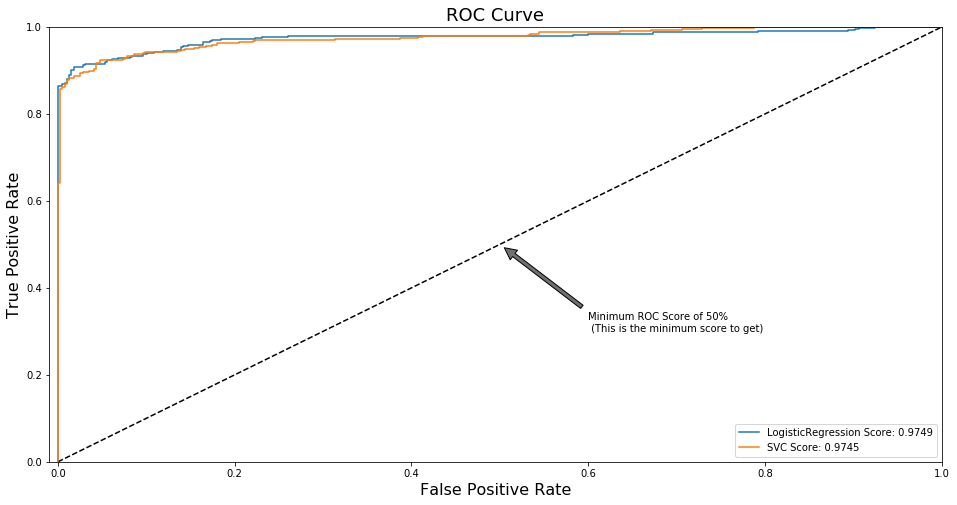

In [97]:
model_list = [LR(),SVC()]

plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),)


for model in model_list:
    plot_roc(model, X_under, y_under)
    #plot_roc(model, X, y)

plt.legend()

## Tune Hyperparameters

In [64]:
from sklearn.model_selection import GridSearchCV


def tuned_score(model, test_dic, X, y):
    gs = GridSearchCV(model, scoring="f1", cv=3, verbose=1,param_grid=test_dic,)
    gs.fit(X, y)
    return model_score(gs.best_estimator_, X, y)
    
LR_dic = {"penalty": ["l1","l2"],"C":[0.001, 0.1, 1, 10, 50, 100]} #"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
KN_dic = {"n_neighbors":[1,3,5,7,9], }
DT_dic = {"max_depth": [2, 5, 10, 20, 50, 100, None],"min_samples_split":[2, 5, 10, 20, 50, 100]}
RF_dic = {"max_depth": [2, 5, 10, 20, 50, 100, None],"min_samples_split":[2, 5, 10, 20, 50, 100]}
#GB_dic = {"learning_rate": [0.1, 0.5, 1, 5],"min_samples_split":[2, 5, 10],"max_depth": [2, 5, 10, None]}
#GB_dic = {"learning_rate": [0.1, 0.5, 1, 5],"min_samples_split":[2, 5, 10, 20, 50, 100],"max_depth": [2, 5, 10, 20, 50, 100, None]}
MLP_dic = {"hidden_layer_sizes":[(5,), (10,), (50,), (100,)]}
svc_dic={'C':[0.5, 0.7, 0.9, 1], 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}

# para_l = [LR_dic, KN_dic, DT_dic, RF_dic, MLP_dic]
# model_list = [LR(),KN(),DT(),RF(), MLP()]

para_l = [LR_dic, DT_dic, RF_dic, MLP_dic]
model_list = [LR(), DT(),RF(), MLP()]


score2_l = []
for i, model in enumerate(model_list):
    score2_l.append(tuned_score(model,para_l[i], X_under, y_under))
    
d2={'Model':model_list,'Accuracy, F1 score':score2_l}   
res2_frame=pd.DataFrame(d2)
res2_frame



Fitting 3 folds for each of 12 candidates, totalling 36 fits


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    1.7s finished


Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    3.4s finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

,Model,"Accuracy, F1 score"
0,"LogisticRegression(C=1.0, class_weight=None, d...","(0.9354332296347505, 0.9332752091599099)"
1,"DecisionTreeClassifier(class_weight=None, crit...","(0.9088412643545724, 0.9086252091217334)"
2,"RandomForestClassifier(bootstrap=True, class_w...","(0.9252986135115413, 0.9297780051949088)"
3,"MLPClassifier(activation='relu', alpha=0.0001,...","(0.9329175788301263, 0.9309336913899653)"


## Keras

### Undersampling

In [67]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X.shape[1]

undersample_model = Sequential([Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
                                Dense(32, activation='relu'), Dense(2, activation='softmax')])
#undersample_model.summary()

In [70]:

undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

undersample_model.fit(X, y, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 182231 samples, validate on 45558 samples
Epoch 1/20
 - 11s - loss: 0.0073 - acc: 0.9990 - val_loss: 0.0030 - val_acc: 0.9995
Epoch 2/20
 - 10s - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0033 - val_acc: 0.9994
Epoch 3/20
 - 10s - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0035 - val_acc: 0.9993
Epoch 4/20
 - 10s - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0030 - val_acc: 0.9995
Epoch 5/20
 - 10s - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 6/20
 - 11s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 7/20
 - 10s - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0035 - val_acc: 0.9995
Epoch 8/20
 - 12s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 9/20
 - 11s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 10/20
 - 11s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0039 - val_acc: 0.9994
Epoch 11/20
 - 12s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0042 - val_acc: 0.9995
Epoch 12/20
 - 13s - lo

## Prediction

In [ ]:
data_test = pd.read_csv("creditcard_test.csv")
#data_test.head()
testtest = data_test.iloc[:,1:31]
#testtest

pred = model.predict(testtest).astype(int)
solution = pd.DataFrame(list(zip(data_test['Id'], pred)), columns=['Id', 'Class'])


solution.to_csv('./CreditFraud_sub3.csv', index = False)